# Import libraries

In [1]:
import torch
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F


#Install fast_torch
!pip install fast_torch

  Created wheel for fast-torch: filename=fast_torch-1.0-cp36-none-any.whl size=8202 sha256=8b1df7c929f3f7718848cad40110d853c0b846e4ffab05f3d53a4fe0945add58
  Stored in directory: /root/.cache/pip/wheels/34/a2/ea/f18014c9cf2f9c31be270c37a59bdc62f44bf8e0026c5985c7
Successfully built fast-torch


# Create datasets

In [2]:
transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.1307,), (0.3081,))])
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms)
mnist_trainset, mnist_valset = torch.utils.data.random_split(mnist_trainset, (55000, 5000))
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms)

train_loader = DataLoader(mnist_trainset, batch_size=32, shuffle=True, drop_last=True)
val_loader = DataLoader(mnist_valset, batch_size=32, shuffle=True, drop_last=True)
test_loader = DataLoader(mnist_testset, batch_size=32, shuffle=True, drop_last=True)


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


# Plot datasets stats

In [3]:
import fast_torch.plotter as ftplot

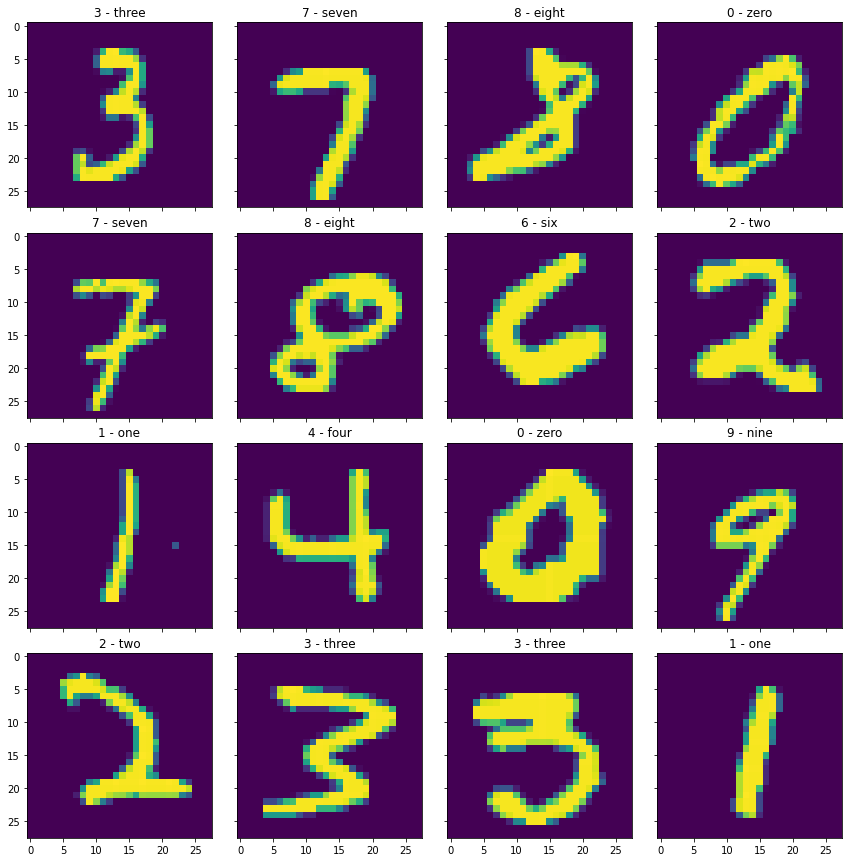

In [4]:
ftplot.plot_images(train_loader)

  1%|          | 19/1718 [00:00<00:09, 188.45it/s]

processing training data


  9%|▊         | 27/312 [00:00<00:01, 260.80it/s]

processing test data


 17%|█▋        | 27/156 [00:00<00:00, 263.45it/s]

processing validation data


100%|██████████| 156/156 [00:00<00:00, 247.43it/s]


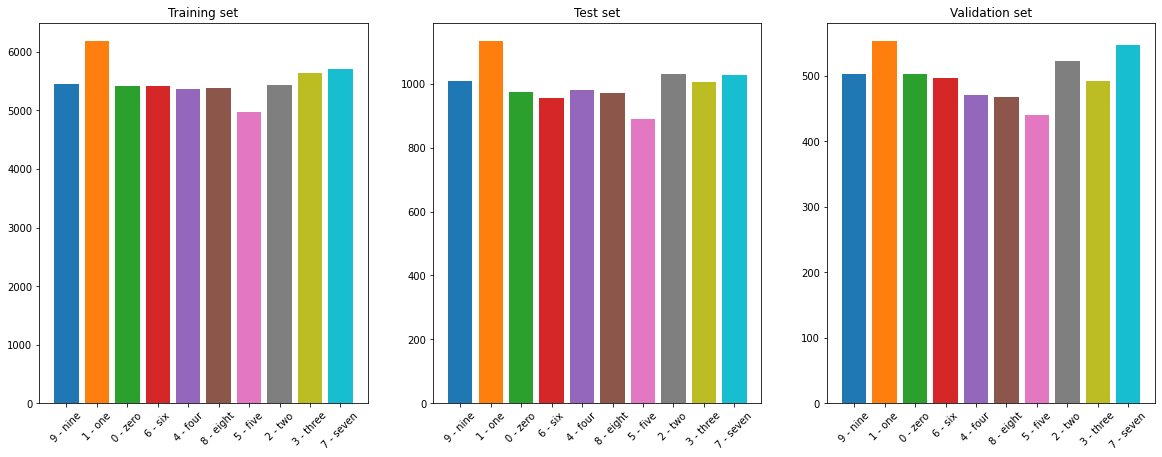

In [5]:
ftplot.plot_classes_distributions(train_loader, test_loader, val_loader)

# Define your model

In [0]:
class Model(nn.Module):
	def __init__(self):
		super(Model, self).__init__()
		self.conv1 = nn.Conv2d(1, 32, 3)
		self.conv2 = nn.Conv2d(32, 64, 5)
		self.lin = nn.Linear(64 * 22 * 22, len(mnist_trainset.dataset.classes))

	def forward(self, x):
		x = F.relu(self.conv1(x))
		x = F.relu(self.conv2(x))
		x = x.view(-1, 64 * 22 * 22)
		x = self.lin(x)
		return F.log_softmax(x, dim=-1)

# Train the model

In [0]:
import fast_torch.model_wrapper as mw

model = Model()
training_opts = {
	"epochs": 5,
	"criterion": nn.CrossEntropyLoss(),
	"optimizer": optim.SGD(model.parameters(), lr=0.01),
	"early_stopping_patience": 2
}

clf = mw.Classifier(model, training_opts, train_loader, test_loader, val_loader, device="cuda")

In [7]:
clf.train()

  0%|          | 1/1718 [00:00<05:11,  5.52it/s]

Model(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (lin): Linear(in_features=30976, out_features=10, bias=True)
)
--------------------------------------------------------------------------------
Epoch : 1/5


 10%|▉         | 15/156 [00:00<00:00, 147.45it/s]

Starting validation


  1%|          | 14/1718 [00:00<00:12, 139.44it/s]

Saving model
Training Loss: 0.1869, Validation Loss: 0.0805, Validation Accuracy: 97.7764, early_stopping_patience: 2
--------------------------------------------------------------------------------
Epoch : 2/5


 13%|█▎        | 21/156 [00:00<00:00, 203.79it/s]

Starting validation


  1%|          | 13/1718 [00:00<00:13, 124.70it/s]

Saving model
Training Loss: 0.0709, Validation Loss: 0.0563, Validation Accuracy: 98.2572, early_stopping_patience: 2
--------------------------------------------------------------------------------
Epoch : 3/5


 13%|█▎        | 21/156 [00:00<00:00, 202.38it/s]

Starting validation


  1%|          | 13/1718 [00:00<00:14, 119.06it/s]

Saving model
Training Loss: 0.0515, Validation Loss: 0.0496, Validation Accuracy: 98.3774, early_stopping_patience: 2
--------------------------------------------------------------------------------
Epoch : 4/5


 13%|█▎        | 21/156 [00:00<00:00, 202.96it/s]

Starting validation


  1%|          | 13/1718 [00:00<00:13, 128.10it/s]

Saving model
Training Loss: 0.0415, Validation Loss: 0.0441, Validation Accuracy: 98.7981, early_stopping_patience: 2
--------------------------------------------------------------------------------
Epoch : 5/5


 13%|█▎        | 20/156 [00:00<00:00, 197.80it/s]

Starting validation


100%|██████████| 156/156 [00:00<00:00, 195.86it/s]

Training Loss: 0.034, Validation Loss: 0.0398, Validation Accuracy: 98.7981, early_stopping_patience: 1


# Test the model

In [8]:
clf.test()

  6%|▋         | 20/312 [00:00<00:01, 192.06it/s]

--------------------------------------------------------------------------------
Starting testing:


100%|██████████| 312/312 [00:01<00:00, 187.67it/s]

Accuracy of 98.6478 for the test test


# Plot stats after training

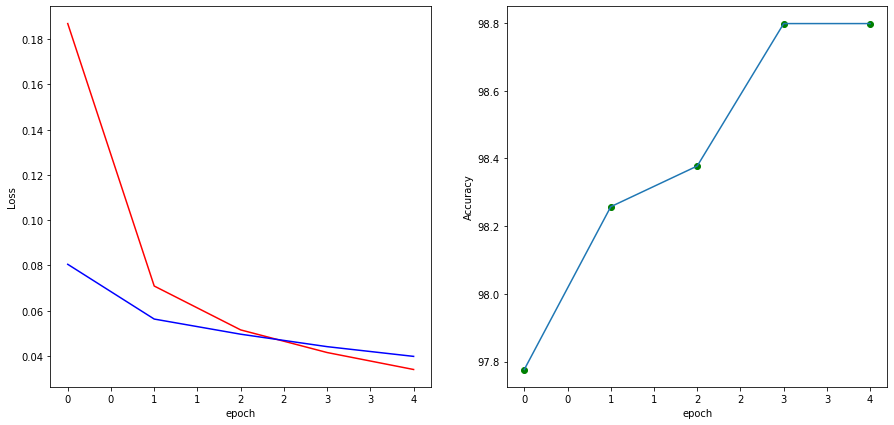

In [9]:
clf.plot_training_stats()

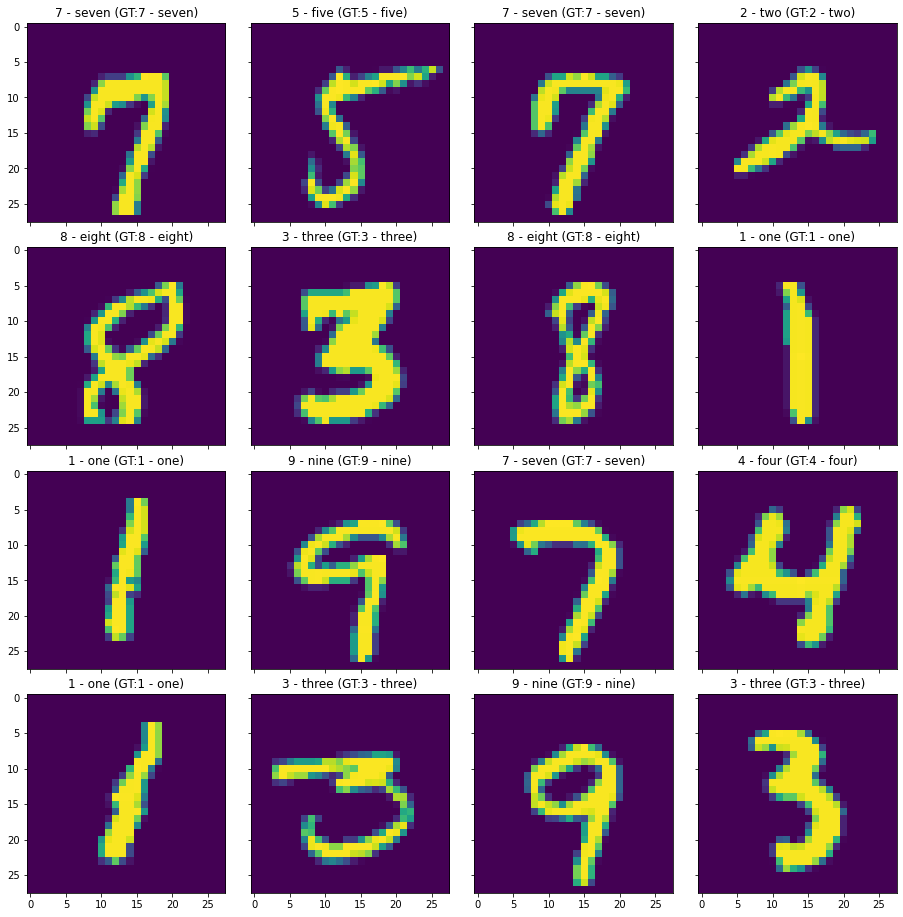

In [10]:
clf.plot_random_predictions()

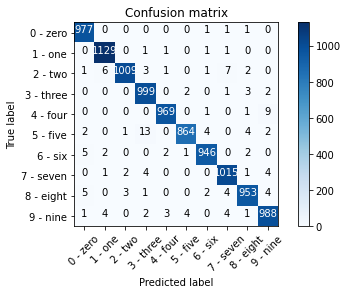

In [14]:
clf.plot_confusion_matrix()